In [1]:
import random
from numpy import *
import matplotlib.pyplot as plt
import copy
import time 

def load_data():
    x1=loadtxt('dat1.txt')
    x2=loadtxt('dat2.txt') 
    x1=x1-mean(x1)
    x2=x2-mean(x2)
    X=array([x1,x2]) 
    return X;

def whiten(X):
    xx=dot(X,X.T)
    D,E = linalg.eig(xx)
    D=diag(1/sqrt(D))
    V = dot(D, E.T)
    Z=dot(V,X)
    return Z

def Decorrelation(W):
    d, e = linalg.eigh(dot(W, W.T))
    return dot(dot(e * (1. / sqrt(d)), e.T), W)

def do_fastica(Z):
    n, m = Z.shape;
    Z *= sqrt(Z.shape[1])
    W = ones((n,n), float32)
    y=ones((n,m), float32)
    for i in range(n): 
        for j in range(n):
            W[i][j] = random.random()
    for i in range(n):  
        W[i]= W[i]/linalg.norm(W[i])
        while True:
            W1=copy.copy(W)
            y[i] = dot(W[i].T,Z)
            for j in range(n):
                W[i][j] = mean((Z*(y[i]**3))[j]) - 3*W[i][j]
            W[i] = W[i]/linalg.norm(W[i])
            W = Decorrelation(W)
            lim = abs(abs(dot(W[i].T,W1[i]))-1)
            if lim < 0.000000000001:
                break
    return W
start = time.clock()
X=load_data()
Z=whiten(X)
W = do_fastica(Z)
S=dot(W,Z)
plt.plot(S[0])
plt.plot(S[1])
plt.show()
end = time.clock()

print (end-start)


<Figure size 640x480 with 1 Axes>

0.1487320000000001


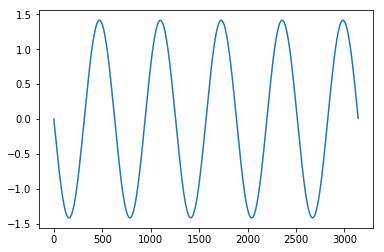

In [5]:
plt.plot(S[0])
plt.show()

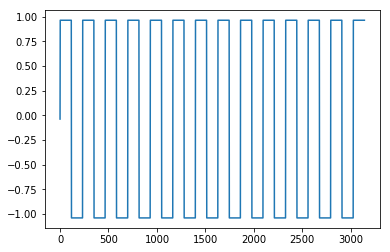

In [6]:
plt.plot(S[1])
plt.show()